In [58]:
import pandas as pd
import re

df = pd.read_excel("./UN_MigrantStockTotal_2015.xlsx",sheet_name="Table 1")

#dropping unnecessary information
df = df.drop(range(0,15))

#named each colums, will split them later (especially year and gender which is now combinded together)
df.columns=['Sort', 'Country/Area','Notes','Country Code','Data Type','1990b', '1995b', '2000b','2005b','2010b','2015b','1990m', '1995m', '2000m','2005m','2010m','2015m','1990f', '1995f', '2000f','2005f','2010f','2015f']

#droped three columns, will fix later if needed
df = df.drop('Notes', axis=1)
df = df.drop('Data Type', axis=1)
df = df.drop('Sort', axis=1)

#showing rows of current data frame
df.head(100)

,Country/Area,Country Code,1990b,1995b,2000b,2005b,2010b,2015b,1990m,1995m,2000m,2005m,2010m,2015m,1990f,1995f,2000f,2005f,2010f,2015f
15,WORLD,900,152563212,160801752,172703309,191269100,221714243.0,243700236.0,77747510,81737477,87884839,97866674,114613714.0,126115435.0,74815702,79064275,84818470,93402426,107100529.0,117584801.0
16,Developed regions,901,82378628,92306854,103375363,117181109,132560325.0,140481955.0,40263397,45092799,50536796,57217777,64081077.0,67618619.0,42115231,47214055,52838567,59963332,68479248.0,72863336.0
17,Developing regions,902,70184584,68494898,69327946,74087991,89153918.0,103218281.0,37484113,36644678,37348043,40648897,50532637.0,58496816.0,32700471,31850220,31979903,33439094,38621281.0,44721465.0
18,Least developed countries,941,11075966,11711703,10077824,9809634,10018128.0,11951316.0,5843107,6142712,5361902,5383009,5462714.0,6463217.0,5236216,5573685,4721920,4432371,4560536.0,5493028.0
19,Less developed regions excluding least develop...,934,59105261,56778501,59244124,64272611,79130668.0,91262036.0,31641006,30501966,31986141,35265888,45069923.0,52033599.0,27464255,26276535,27257983,29006723,34060745.0,39228437.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Timor-Leste,626,8954,9743,10602,11286,10983.0,10834.0,4450,4763,5095,5582,6441.0,6383.0,4504,4980,5507,5704,4542.0,4451.0
111,Viet Nam,704,28118,51262,56754,51768,61756.0,72793.0,15230,28187,32825,31106,35971.0,42168.0,12888,23075,23929,20662,25785.0,30625.0
112,Southern Asia,5501,19436343,15343019,15278020,13722011,14326591.0,14103682.0,10601061,8382298,8414610,7537840,7953646.0,7699380.0,8835282,6960721,6863410,6184171,6372945.0,6404302.0
113,Afghanistan,4,57686,71522,75917,87300,102246.0,382365.0,32558,39105,42848,49274,57709.0,193445.0,25128,32417,33069,38026,44537.0,188920.0


In [59]:
#splitting my dataframe #1 for regions


regionsDf = df[(df['Country Code'] == 901)|(df['Country Code'] == 902)|(df['Country Code'] == 941)|(df['Country Code'] == 934)] 

#Melting the year column using pandas documentation following tidy data principle #1 Column names need to be informative, variable names and not values
regionsDf = regionsDf.melt(id_vars=["Country/Area","Country Code"], var_name=["Years"],value_name="International migrant stock at mid-year")

#Renaming column to Regions
regionsDf.rename(columns={'Country/Area': 'Regions'}, inplace=True)

#here I am seperating year from gender following tidy data principle #2 each column needs to consist of one and only one variable
regionsDf=(regionsDf.assign(Gender = lambda x: x.Years.str[4].astype(str), Year = lambda x: x.Years.str[:4].astype(str)).drop("Years",axis=1))

regionsDf.head(100)


,Regions,Country Code,International migrant stock at mid-year,Gender,Year
0,Developed regions,901,82378628,b,1990
1,Developing regions,902,70184584,b,1990
2,Least developed countries,941,11075966,b,1990
3,Less developed regions excluding least develop...,934,59105261,b,1990
4,Developed regions,901,92306854,b,1995
...,...,...,...,...,...
67,Less developed regions excluding least develop...,934,34060745.0,f,2010
68,Developed regions,901,72863336.0,f,2015
69,Developing regions,902,44721465.0,f,2015
70,Least developed countries,941,5493028.0,f,2015


In [60]:
#splitting my dataframe #2 for Countries

CountryDf = df[(df['Country Code'] <900)]


#Melting the year column using pandas documentation following tidy data principle #1 Column names need to be informative, variable names and not values
CountryDf = CountryDf.melt(id_vars=["Country/Area","Country Code"], var_name=["Years"],value_name="International migrant stock at mid-year")

#Renaming the column to Countries
CountryDf.rename(columns={'Country/Area': 'Countries'}, inplace=True)

#Seperating year from gender following tidy data principle #2 each column needs to consist of one and only one variable
CountryDf=(CountryDf.assign(Gender = lambda x: x.Years.str[4].astype(str), Year = lambda x: x.Years.str[:4].astype(str)).drop("Years",axis=1))

CountryDf.head(100)


,Countries,Country Code,International migrant stock at mid-year,Gender,Year
0,Burundi,108,333110,b,1990
1,Comoros,174,14079,b,1990
2,Djibouti,262,122221,b,1990
3,Eritrea,232,11848,b,1990
4,Ethiopia,231,1155390,b,1990
...,...,...,...,...,...
95,Iraq,368,83638,b,1990
96,Israel,376,1632704,b,1990
97,Jordan,400,1146349,b,1990
98,Kuwait,414,1074391,b,1990


In [71]:
#splitting my dataframe #3 for Area of Destination

#Identifying the parameters I want to include in this data, sorting them according to country codes
AreaDf = df[((df['Country Code'] > 903) & (df['Country Code']< 954))|(df['Country Code']== 5501)|(df['Country Code']== 5500)]

#Because some of the areas includes regions between 903 to 954, I want to exclude the regions in here so I am using a function including the "not equal to "
AreaDf = AreaDf[(AreaDf['Country Code'] != 941)&(AreaDf['Country Code'] !=901)&(AreaDf['Country Code'] !=902)&(AreaDf['Country Code'] !=934)]

#renaming the column using pandas documentation
AreaDf.rename(columns={'Country/Area': 'Area of Destination'}, inplace=True)

#right here I am melting the year column using pandas documentation following tidy data principle #1 Column names need to be informative, variable names and not values
AreaDf = AreaDf.melt(id_vars=["Area of Destination","Country Code"], var_name=["Years"],value_name="International migrant stock at mid-year")

#here I am seperating year from gender following tidy data principle #2 each column needs to consist of one and only one variable
AreaDf=(AreaDf.assign(Gender = lambda x: x.Years.str[4].astype(str), Year = lambda x: x.Years.str[:4].astype(str)).drop("Years",axis=1))

AreaDf.head(100)

,Area of Destination,Country Code,International migrant stock at mid-year,Gender,Year
0,Sub-Saharan Africa,947,14690319,b,1990
1,Eastern Africa,910,5964031,b,1990
2,Middle Africa,911,1460530,b,1990
3,Northern Africa,912,2403200,b,1990
4,Southern Africa,913,1392359,b,1990
...,...,...,...,...,...
95,South America,931,4518645,b,2005
96,Northern America,905,45363387,b,2005
97,Oceania,909,6023421,b,2005
98,Australia and New Zealand,927,5717982,b,2005


In [62]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go

from IPython.display import HTML
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
 #nian x, country code y.scattered

In [63]:
AreaDf.shape

(450, 5)

In [64]:
AreaDf.describe()

,Area of Destination,Country Code,International migrant stock at mid-year,Gender,Year
count,450,450,450.0,450,450
unique,25,25,450.0,3,6
top,Sub-Saharan Africa,947,14690319.0,b,1990
freq,18,18,1.0,150,75


In [65]:
AreaDf.columns

Index(['Area of Destination', 'Country Code',
       'International migrant stock at mid-year', 'Gender', 'Year'],
      dtype='object')

In [66]:
AreaDf.nunique

<bound method DataFrame.nunique of            Area of Destination Country Code  \
0           Sub-Saharan Africa          947   
1               Eastern Africa          910   
2                Middle Africa          911   
3              Northern Africa          912   
4              Southern Africa          913   
..                         ...          ...   
445              South America          931   
446           Northern America          905   
447                    Oceania          909   
448  Australia and New Zealand          927   
449                  Melanesia          928   

    International migrant stock at mid-year Gender  Year  
0                                  14690319      b  1990  
1                                   5964031      b  1990  
2                                   1460530      b  1990  
3                                   2403200      b  1990  
4                                   1392359      b  1990  
..                                      ...   

In [67]:
WorldDf = df[(df['Country Code'] == 900)] 

#Melting the year column using pandas documentation following tidy data principle #1 Column names need to be informative, variable names and not values
WorldDf = WorldDf.melt(id_vars=["Country/Area","Country Code"], var_name=["Years"],value_name="International migrant stock at mid-year")

#Renaming column to Regions
WorldDf.rename(columns={'Country/Area': 'Regions'}, inplace=True)

#here I am seperating year from gender following tidy data principle #2 each column needs to consist of one and only one variable
WorldDf=(WorldDf.assign(Gender = lambda x: x.Years.str[4].astype(str), Year = lambda x: x.Years.str[:4].astype(str)).drop("Years",axis=1))

WorldDf.head()


,Regions,Country Code,International migrant stock at mid-year,Gender,Year
0,WORLD,900,152563212,b,1990
1,WORLD,900,160801752,b,1995
2,WORLD,900,172703309,b,2000
3,WORLD,900,191269100,b,2005
4,WORLD,900,221714243.0,b,2010


In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


WorldDf.shape

(18, 5)

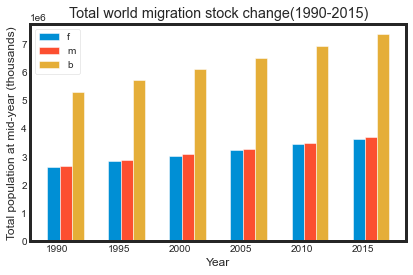

In [70]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#compare total international migration stock in world through out the years



#set x values and three bar values
w=0.2
x=["1990","1995","2000","2005","2010","2015"]
#y=[2000000,3000000,4000000,5000000,600000,7000000,800000]
f=[2639243.998,2848487.191,3042084.459,3234553.601,3435768.139,3642266.346]
m=[2670423.701,2886635.893,3084537.662,3285082.249,3493956.904,3707205.753]
b=[5309667.699,5735123.084,6126622.121,6519635.85,6929725.043,7349472.099]


#arange bar settings
bar1=np.arange(len(x))
bar2=[i+w for i in bar1]
bar3=[i+w for i in bar2]
plt.bar(bar1,f,w,label="f")
plt.bar(bar2,m,w,label="m")
plt.bar(bar3,b,w,label="b")

#label the x and y axis
plt.xlabel("Year")
plt.ylabel("Total population at mid-year (thousands)")
plt.xticks(bar1+w/3,x,)
plt.legend()
plt.title("Total world migration stock change(1990-2015)")
plt.show()

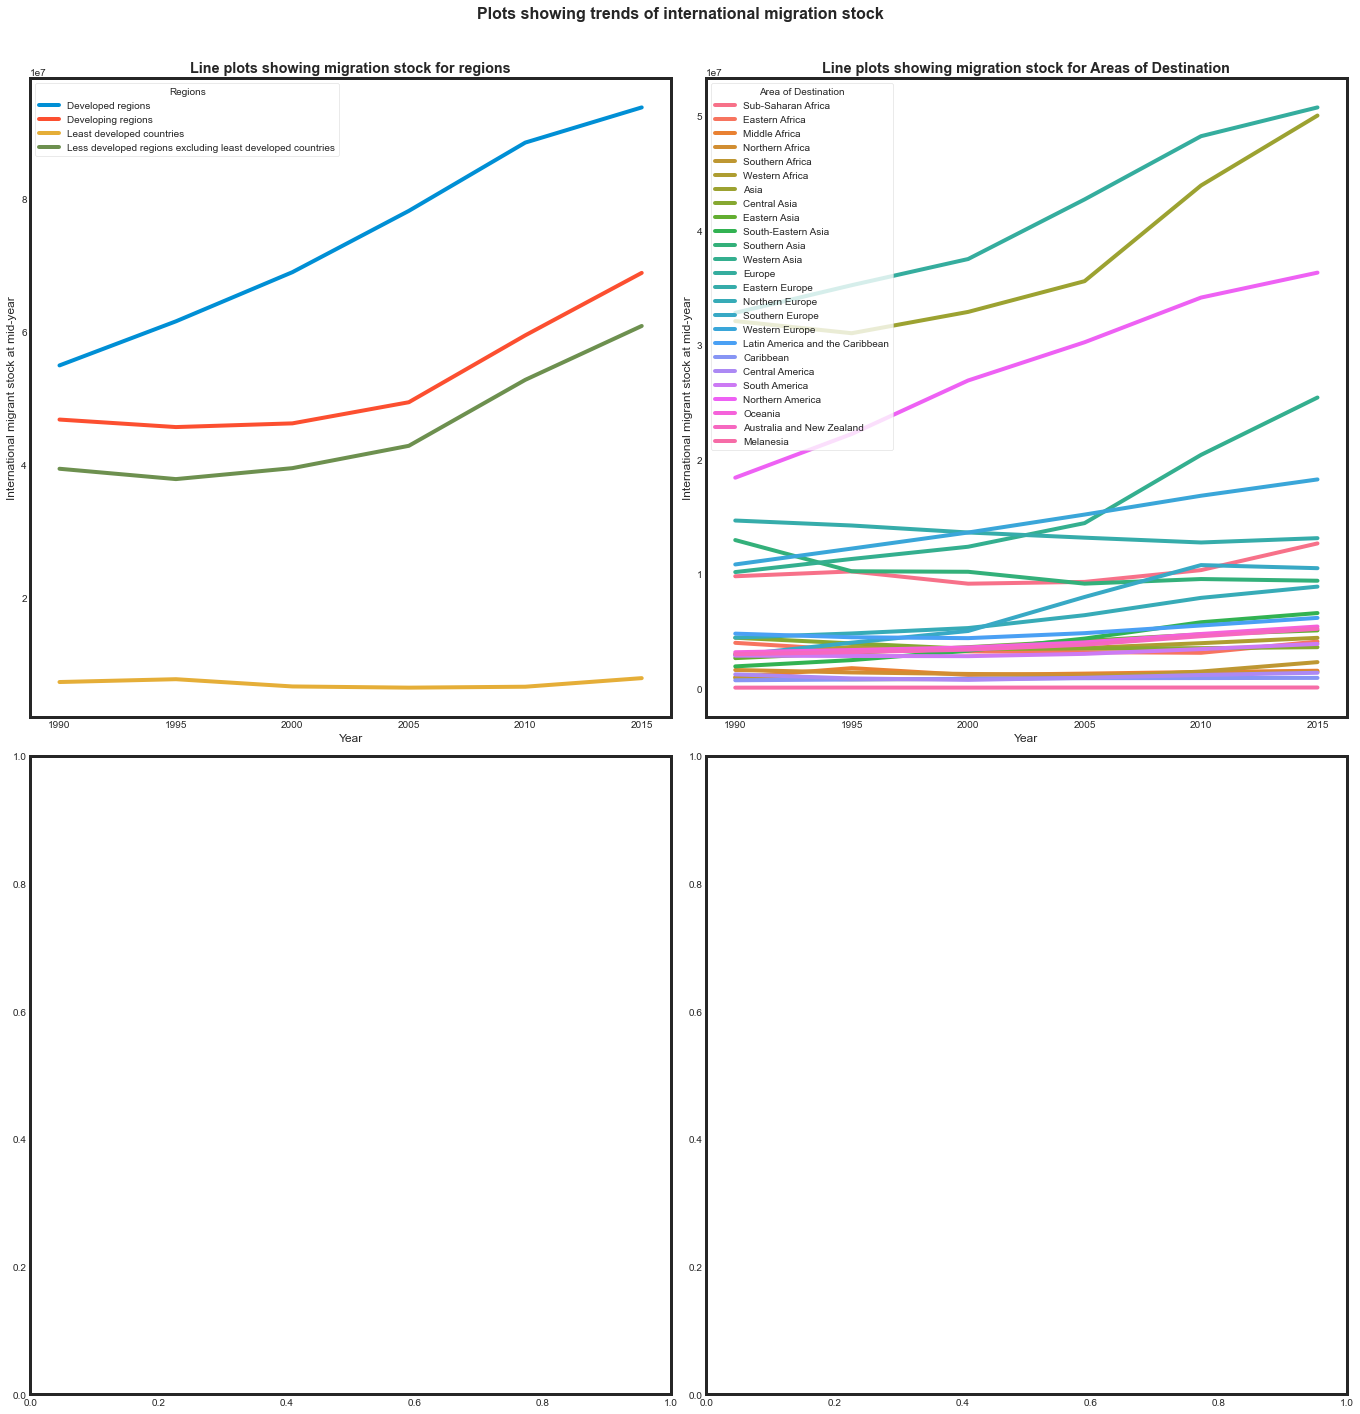

In [89]:

sns.set_style('white')

#two plots showing the international migration change in regions and in areas of destination
f, ax = plt.subplots(2, 2, figsize=(19,20))
f.suptitle('Plots showing trends of international migration stock',fontweight='bold',fontsize=16)


ax[0,0].set_title('Line plots showing migration stock for regions',fontweight="bold")
ax[0,0].set_ylabel('International migrant stock at mid-year')
sns.lineplot(y="International migrant stock at mid-year", x="Year", hue = "Regions", estimator = "mean", ci=None, data=regionsDf, ax=ax[0,0])

ax[0,1].set_title('Line plots showing migration stock for Areas of Destination',fontweight="bold")
ax[0,1].set_ylabel('International migrant stock at mid-year')
sns.lineplot(y="International migrant stock at mid-year", x="Year", hue = "Area of Destination", estimator = "mean", ci=None, data=AreaDf, ax=ax[0,1])



f.tight_layout()
f.subplots_adjust(top=.93)
plt.show()